In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as U
from astropy import constants as const
from astropy.coordinates import SkyCoord
import astropy.units as U
import astropy 
from astropy.io import fits
import seaborn as sns
import os

In [59]:
data = pd.read_csv('all_alma_data.csv')


/var/folders/66/76q50s015tq8wc5qz1pvg7y40000gn/T/ipykernel_31753/970427404.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_alma_data.csv')


In [99]:
observation_metadata = data[['s_resolution', 't_exptime', 'em_min', 't_resolution',
                        'em_max', 'em_resolution', 'spatial_resolution', 'bandwidth', 
                        'frequency', 'frequency_support', 'velocity_resolution', 'sensitivity_10kms', 
                        'cont_sensitivity_bandwidth', 'scan_intent', 's_ra', 's_dec', 'antenna_arrays']]
observation_metadata = observation_metadata.dropna()
scan_intents = observation_metadata['scan_intent'].values
ids = []
for i, scan in enumerate(scan_intents):
    if scan == 'TARGET':
        ids.append(i)
ids = np.array(ids)
observation_metadata = observation_metadata.iloc[ids, :]
observation_metadata = observation_metadata[(observation_metadata['s_resolution'] == observation_metadata['spatial_resolution'])]
observation_metadata = observation_metadata.drop(columns=['s_resolution'])     
observation_metadata = observation_metadata[['spatial_resolution', 't_exptime', 'em_min','em_max', 'em_resolution', 
            'bandwidth', 'frequency', 'frequency_support', 'velocity_resolution', 's_ra', 's_dec', 't_resolution', 'antenna_arrays']]

observation_metadata['velocity_resolution'] = observation_metadata['velocity_resolution'] * 10**(-3)
observation_metadata = observation_metadata.rename(columns={'spatial_resolution': 'spatial_resolution [arcsec]',
                                                            't_exptime': 'integration_time [s]',
                                                            'em_resolution': 'frequency_resolution [m]',
                                                            'bandwidth': 'bandwidth [MHz]',
                                                            'frequency': 'frequency [GHz]',
                                                            'velocity_resolution': 'velocity_resolution [Km/s]',
                                                            'em_min': 'frequency_min [m]', 'em_max': 'frequency_max [m]',
                                                            's_ra': 'ra [deg]', 's_dec': 'dec [deg]'})
observation_metadata['bandwidth [MHz]'] = observation_metadata['bandwidth [MHz]'].values * 10**(-6)
coords = SkyCoord(ra=observation_metadata['ra [deg]'], dec=observation_metadata['dec [deg]'], unit='deg').to_string('hmsdms')
freq_sup = observation_metadata['frequency_support'].values
freq_res = [int(float(f.split(',')[1][:-3]))* 10 ** (-3)  for f in freq_sup]
observation_metadata['frequency_resolution [MHz]'] = freq_res
b = 'J2000 '
coords = [b + i for i in coords]
observation_metadata['coords'] = coords
observation_metadata.rename(columns={'coords': 'coords [J2000]'}, inplace=True)
antenna_arrays = observation_metadata['antenna_arrays'].values
antenna_arrays = [[a.split(':')[0] for a in antenna_arrays[i].split(' ')] for i in range(len(antenna_arrays))]
print(antenna_arrays[0])
print(type(antenna_arrays[0]))
observation_metadata['pads'] = antenna_arrays
to_save = observation_metadata[['spatial_resolution [arcsec]', 'integration_time [s]', 
                                'velocity_resolution [Km/s]', 'ra [deg]', 'dec [deg]', 
                                'bandwidth [MHz]', 'frequency [GHz]', 'pads', 
                                'frequency_resolution [MHz]', 'coords [J2000]']]
to_save.to_csv('obs_configurations.csv', index=False)

['J501', 'J502', 'J503', 'J504', 'J506', 'N601', 'N602', 'N603', 'N605']
<class 'list'>
<class 'list'>


In [2]:
def create_antennas_dict():
    antenna_file = open('/Users/michele/Documents/GitHub/ALMASim/alma.all.cfg', 'r')
    antenna_dict = {}
    for line in antenna_file:
        if '#' not in line:
            x, y, z, dim, pad = line.split()
            antenna_dict[pad] = [x, y, z, dim]
    antenna_file.close()
    return antenna_dict

antenna_dict = create_antennas_dict()

obs_db = pd.read_csv('obs_configurations.csv')
n = 10
print(type(obs_db['pads'].values[0]))
params = obs_db.sample(n=n, axis=0)
antenna_configs = params['pads'].values
spatial_res = params['spatial_resolution [arcsec]'].values
test_config = antenna_configs[0]
print(test_config)
print(type(test_config))


<class 'str'>
['A001', 'A002', 'A003', 'A006', 'A007', 'A008', 'A009', 'A010', 'A011', 'A015', 'A016', 'A017', 'A019', 'A022', 'A023', 'A024', 'A025', 'A026', 'A027', 'A033', 'A034', 'A035', 'A036', 'A039', 'A040', 'A041', 'A042', 'A043', 'A044', 'A045', 'A047', 'A048', 'A049', 'A050', 'A058', 'A060', 'A062', 'A066', 'A068', 'A069', 'A070', 'A070', 'A072', 'A073', 'A074', 'A075', 'A075', 'A076', 'A082', 'A083', 'A083', 'A085', 'A088', 'A088']
<class 'str'>


In [3]:
test_config = test_config[1:-1].split(', ')
test_config = [a[1:-1] for a in test_config]
print(test_config)

['A001', 'A002', 'A003', 'A006', 'A007', 'A008', 'A009', 'A010', 'A011', 'A015', 'A016', 'A017', 'A019', 'A022', 'A023', 'A024', 'A025', 'A026', 'A027', 'A033', 'A034', 'A035', 'A036', 'A039', 'A040', 'A041', 'A042', 'A043', 'A044', 'A045', 'A047', 'A048', 'A049', 'A050', 'A058', 'A060', 'A062', 'A066', 'A068', 'A069', 'A070', 'A070', 'A072', 'A073', 'A074', 'A075', 'A075', 'A076', 'A082', 'A083', 'A083', 'A085', 'A088', 'A088']


In [4]:
beginning_lines = ['# observatory=ALMA', '# coordsys=LOC (local tangent plane)', '# x y z diam pad#']
i = 0
with open(os.path.join('/Users/michele/Documents/GitHub/ALMASim/antenna_config', 'antenna_config_{}.cfg'.format(str(i))), 'w') as f:
    for line in beginning_lines:
        f.write(line)
        f.write('\n')
    for antenna in test_config:
        print(antenna)
        x, y, z, dim = antenna_dict[antenna]
        print(x, y, z, dim)
        f.write('{} {} {} {} {}'.format(x, y, z, dim, antenna))
        f.write('\n')
    f.close()

A001
5.606192499 7.646657746 -2.087775605 12.
A002
22.0465959 10.78995868 -2.085737713 12.
A003
16.9413543 28.41476916 -2.082643323 12.
A006
60.44668677 -1.065310291 -2.089494285 12.
A007
55.4353013 19.72317522 -2.087556286 12.
A008
48.98284 33.32294429 -2.489031714 12.
A009
29.66575936 56.57212469 -2.485582693 12.
A010
18.60625963 66.83839826 -2.201563745 12.
A011
77.32651615 -15.4773776 -2.239047365 12.
A015
50.24060942 60.83113893 -2.48917588 12.
A016
18.88013306 86.49162757 -2.293650599 12.
A017
32.78896049 35.44741771 -2.087282025 12.
A019
-10.80422027 9.190034675 -2.089364764 12.
A022
-4.143362048 67.65676897 -2.086146954 12.
A023
-19.90369337 52.82680653 -1.892119601 12.
A024
-34.9743094 35.74249598 -1.889014917 12.
A025
-45.02243039 15.50531007 -1.695748426 12.
A026
-47.37263533 -11.86280086 -1.683028077 12.
A027
-53.64302244 -25.56059112 -1.693641822 12.
A033
-65.93883391 -34.60348784 -1.392588547 12.
A034
-37.4023229 2.226137174 -1.685258226 12.
A035
13.45860758 -5.790196849 

In [12]:
metadata = pd.read_csv('/Users/michele/Documents/GitHub/ALMASim/obs_configurations.csv')
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32887 entries, 0 to 32886
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   spatial_resolution [arcsec]  32887 non-null  float64
 1   integration_time [s]         32887 non-null  float64
 2   velocity_resolution [Km/s]   32887 non-null  float64
 3   ra [deg]                     32887 non-null  float64
 4   dec [deg]                    32887 non-null  float64
 5   bandwidth [MHz]              32887 non-null  float64
 6   frequency [GHz]              32887 non-null  float64
 7   pads                         32887 non-null  object 
 8   frequency_resolution [MHz]   32887 non-null  float64
 9   coords [J2000]               32887 non-null  object 
dtypes: float64(8), object(2)
memory usage: 2.5+ MB


10.08
1303.1263158694924


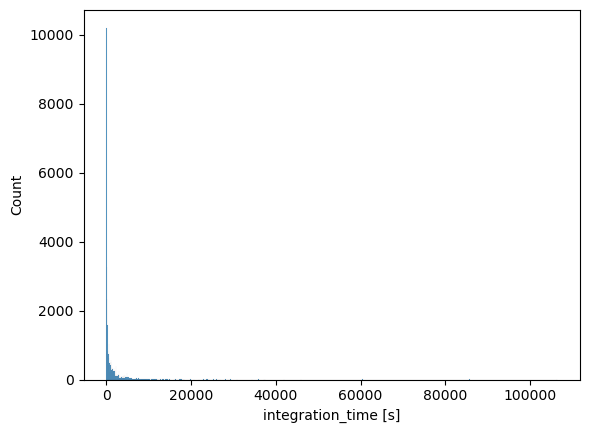

In [14]:
sns.histplot(metadata, x='integration_time [s]')
print(np.min(metadata['integration_time [s]'].values))
print(np.mean(metadata['integration_time [s]'].values))